In [4]:
#Uploading the cleaned file
from google.colab import files
uploaded=files.upload()

Saving Cleaned_Smart_Todo.csv to Cleaned_Smart_Todo.csv


In [8]:
#If 'priority' column doesn't exist, create dummy priorities
import numpy as np
if 'priority' not in df.columns:
  df['priority']=np.random.choice(['Low','Medium','High'],size=len(df))

In [12]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=500)
X=tfidf.fit_transform(df['cleaned_text'])
# Target Column
y=df['priority']

In [15]:
# Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
# Train Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)


In [17]:
# Train SVM Classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [18]:
# Evaluation (Accuracy, Precision, Recall)
from sklearn.metrics import classification_report

print("🔍 Naive Bayes Results:\n")
print(classification_report(y_test, y_pred_nb))

print("🔍 SVM Results:\n")
print(classification_report(y_test, y_pred_svm))


🔍 Naive Bayes Results:

              precision    recall  f1-score   support

        High       0.33      0.35      0.34      1363
         Low       0.32      0.32      0.32      1306
      Medium       0.35      0.33      0.34      1356

    accuracy                           0.34      4025
   macro avg       0.34      0.34      0.34      4025
weighted avg       0.34      0.34      0.34      4025

🔍 SVM Results:

              precision    recall  f1-score   support

        High       0.34      0.33      0.33      1363
         Low       0.33      0.36      0.34      1306
      Medium       0.36      0.34      0.35      1356

    accuracy                           0.34      4025
   macro avg       0.34      0.34      0.34      4025
weighted avg       0.34      0.34      0.34      4025



In [22]:
# Saving Models
import joblib

joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

from google.colab import files

files.download('naive_bayes_model.pkl')
files.download('svm_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

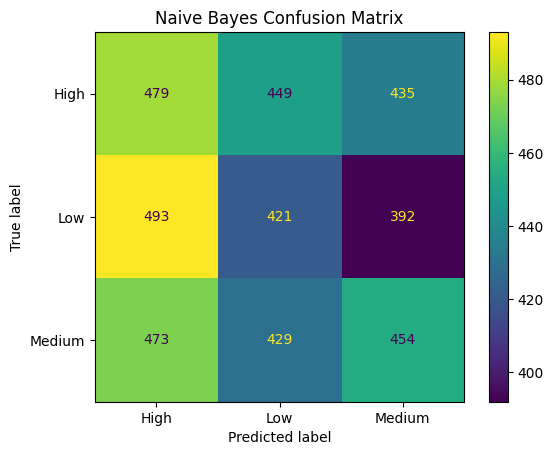

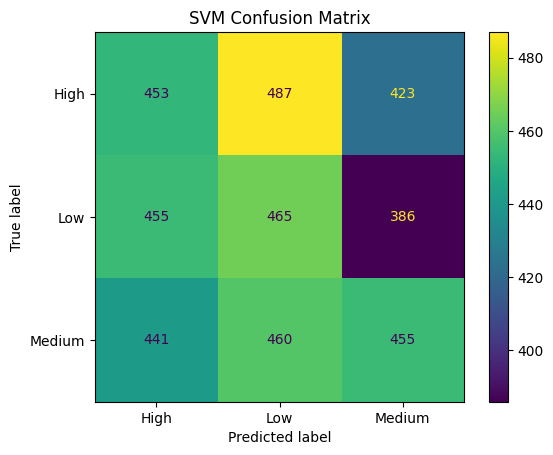

In [21]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Naive Bayes
ConfusionMatrixDisplay.from_estimator(nb_model, X_test, y_test)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()
